test

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
#load the file 
data = pd.read_csv('../data/cleaned_data/cleaned_data.csv')
data.head()
#concatenated_data.to_csv('../data/cleaned_data/cleaned_data.csv', index=False)

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,...,internet_service_Fiber optic,internet_service_No,contract_Month-to-month,contract_One year,contract_Two year,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,churn
0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
1,0.0,0.0,0.0,0.649744,1.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,0.0,0.0,0.0,0.049752,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,1
3,0.0,0.0,0.0,0.766731,0.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,1,0,1,0,0,0,0
4,0.0,0.0,0.0,0.049752,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,1,0,1


In [40]:
#separate the features from the labels
y = data['churn']
X = data.drop(['churn'], axis=1)

In [41]:
y.head(1)

0    0
Name: churn, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
display(y_train.value_counts())
display(y_test.value_counts())

churn
0    3614
1    1308
Name: count, dtype: int64

churn
0    1549
1     561
Name: count, dtype: int64

In [44]:
#SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE()
# Fit and apply SMOTE to generate synthetic samples for the minority class
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [45]:
X_resampled.shape

(7228, 25)

In [46]:
class_counts = y_resampled.value_counts()
print(class_counts)

churn
1    3614
0    3614
Name: count, dtype: int64


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('GB', GradientBoostingClassifier(random_state = 12345)))
models.append(('AB', AdaBoostClassifier(random_state = 12345)))

In [12]:
# evaluate each model in turn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

X_resampled2 = np.ascontiguousarray(X_resampled)
y_resampled2 = np.ascontiguousarray(y_resampled)

names = []
results = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=False)
    cv_results = cross_val_score(model, X_resampled2, y_resampled2, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {cv_results.mean()} ({cv_results.std()})"
    print(msg)


LR: 0.781833733711873 (0.03444718824867721)
KNN: 0.8005314115163428 (0.08218150867969423)
RF: 0.8579422458745686 (0.07029017147046665)
GB: 0.8327620755316989 (0.07230428896145863)
AB: 0.7963647927418459 (0.04861464013169588)


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import accuracy_score, classification_report

In [14]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    }

lg = LogisticRegression(random_state=12345)

grid_search = GridSearchCV(lg, param_grid, cv=5, return_train_score=True,
                           n_jobs=-1, verbose=20, scoring='accuracy')
grid_search.fit(X_train,y_train)
grid_search.best_params_ #To check the best set of parameters returned

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'penalty': None}

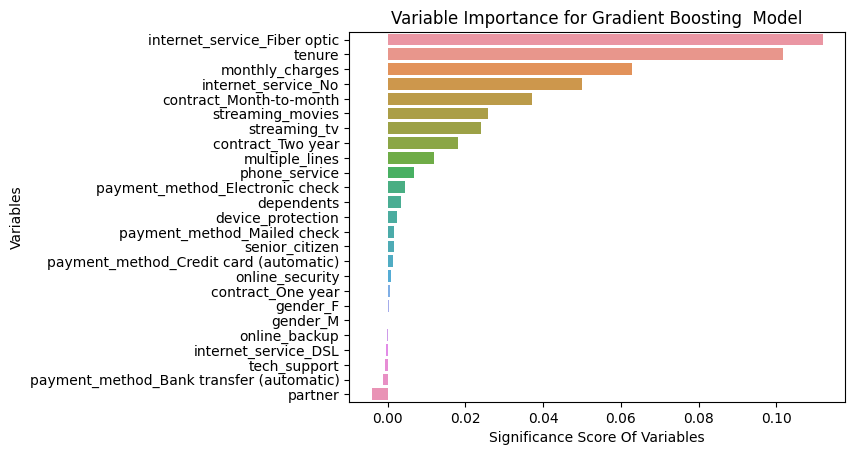

In [16]:

lg1= LogisticRegression(penalty = None)
lg_tuned = lg1.fit(X_train, y_train)

from sklearn.inspection import permutation_importance


# Calculate permutation feature importances
result = permutation_importance(lg_tuned, X_resampled, y_resampled, n_repeats=10, random_state=42)

# Sort and display the results
feature_importances = pd.Series(result.importances_mean, index=X_resampled.columns).sort_values(ascending=False)

# Plot the feature importances
import matplotlib.pyplot as plt

sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Importance for Gradient Boosting  Model")
plt.show()


In [17]:
from sklearn.metrics import confusion_matrix


y_pred = lg1.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
display(cm)

Confusion Matrix:


array([[1388,  161],
       [ 271,  290]])

In [18]:
y_pred_df = pd.DataFrame(y_pred)

y_pred_df.value_counts()

0    1659
1     451
Name: count, dtype: int64

In [19]:
y_test_df = pd.DataFrame(y_test)

y_test_df.value_counts()

churn
0        1549
1         561
Name: count, dtype: int64

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score


y_pred = lg1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# Create a DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa"],
    "Score": [accuracy, precision, recall, f1, kappa]
})

display(metrics_df)

,Metric,Score
0,Accuracy,0.795261
1,Precision,0.643016
2,Recall,0.516934
3,F1-Score,0.573123
4,Kappa,0.440544


[CV 1/5; 1/4] START penalty=l1..................................................
[CV 1/5; 1/4] END ...penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5; 2/4] START penalty=l2..................................................
[CV 2/5; 2/4] END penalty=l2;, score=(train=0.814, test=0.783) total time=   0.1s
[CV 3/5; 1/4] START penalty=l1..................................................
[CV 3/5; 1/4] END ...penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5; 2/4] START penalty=l2..................................................
[CV 5/5; 2/4] END penalty=l2;, score=(train=0.805, test=0.821) total time=   0.1s
[CV 2/5; 1/4] START penalty=l1..................................................
[CV 2/5; 1/4] END ...penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5; 3/4] START penalty=elasticnet..........................................
[CV 2/5; 3/4] END penalty=elasticnet;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5; 3/4] START p

In [23]:
param_grid = {
    'n_estimators': [75, 100, 125],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf' : [1, 2, 5],
    'max_depth':[None],
    'max_features': ['sqrt'] # round(sqrt(#cols))
    }

rf = RandomForestClassifier(random_state=12345)

grid_search = GridSearchCV(rf, param_grid, cv=5,return_train_score=True,n_jobs=-1, verbose = 20)
grid_search.fit(X_resampled,y_resampled)
grid_search.best_params_ #To check the best set of parameters returned

Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 125}

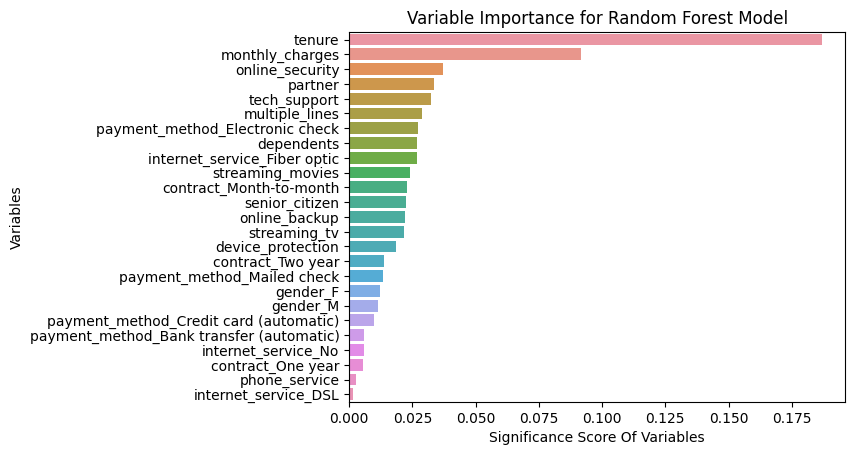

[CV 4/5; 1/54] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 4/5; 1/54] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.999, test=0.907) total time=   1.4s
[CV 4/5; 2/54] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 4/5; 2/54] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.999, test=0.904) total time=   1.6s
[CV 2/5; 4/54] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=75
[CV 2/5; 4/54] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=(train=0.976, test=0.796) total time=   1.3s
[CV 1/5; 6/54] START criterion=gini, max_depth=None, max_features=sqrt,

In [25]:
rf1= RandomForestClassifier(criterion= 'entropy',
 max_depth= None,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 125)



rf_tuned = rf1.fit(X_resampled, y_resampled)

from sklearn.inspection import permutation_importance


# Calculate permutation feature importances
result = permutation_importance(rf1, X_resampled, y_resampled, n_repeats=10, random_state=42)

# Sort and display the results
feature_importances = pd.Series(result.importances_mean, index=X_resampled.columns).sort_values(ascending=False)

# Plot the feature importances
import matplotlib.pyplot as plt

sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Importance for Random Forest Model")
plt.show()


In [26]:
from sklearn.metrics import confusion_matrix


y_pred = rf1.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
display(cm)

Confusion Matrix:


array([[1289,  260],
       [ 240,  321]])

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score


y_pred = rf1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# Create a DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa"],
    "Score": [accuracy, precision, recall, f1, kappa]
})

display(metrics_df)

,Metric,Score
0,Accuracy,0.763033
1,Precision,0.552496
2,Recall,0.572193
3,F1-Score,0.562172
4,Kappa,0.399797


In [ ]:
knn1= KNeighborsClassifier(algorithm= 'auto', n_neighbors= 9, weights= 'distance')
knn_tuned = knn1.fit(X_resampled, y_resampled)


# Calculate permutation feature importances
result = permutation_importance(knn_tuned, X_resampled, y_resampled, n_repeats=10, random_state=42)

# Sort and display the results
feature_importances = pd.Series(result.importances_mean, index=X_trX_resampledain2.columns).sort_values(ascending=False)

# Plot the feature importances
import matplotlib.pyplot as plt

sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Importance for KNN Model")
plt.show()


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

knn2= KNeighborsClassifier(algorithm= 'auto', n_neighbors= 4, weights= 'distance')
knn2.fit(X_resampled, y_resampled)
y_pred = knn2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# Create a DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa"],
    "Score": [accuracy, precision, recall, f1, kappa]
})

display(metrics_df)

,Metric,Score
0,Accuracy,0.711374
1,Precision,0.466197
2,Recall,0.590018
3,F1-Score,0.520850
4,Kappa,0.318376
